In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Packages

In [3]:
%matplotlib notebook

In [4]:
import jyquickhelper
import pandas as pd
import matplotlib as plt
import urllib.request
import sklearn
import math
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from openpyxl import load_workbook
pd.set_option("display.max_columns",200)

## Image Recognition Neural Network

In [5]:
import PIL
from PIL import Image
from PIL import ImageChops
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

### Create the data set

In [12]:
res_h=300 ; res_l=250

pat = "C:/Users/woill/Downloads/Google Images/640 480/cars/"
nb_pic_c=600
yc=pd.DataFrame(columns=["cars","animals","bicycle","house"] ,index=range(1,nb_pic_c+1))
yc.iloc[:,0]=1 ; yc.iloc[:,1:4]=0
Xc=extrc_ph(res_h,res_l,nb_pic_c,pat)

pat = "C:/Users/woill/Downloads/Google Images/640 480/house/"
nb_pic_h=85
yh=pd.DataFrame(columns=["cars","animals","bicycle","house"] ,index=range(1,nb_pic_h+1))
yh.iloc[:,3]=1 ; yh.iloc[:,[0,2,1]]=0
Xh=extrc_ph(res_h,res_l,nb_pic_h,pat)

pat = "C:/Users/woill/Downloads/Google Images/640 480/animals/"
nb_pic_a=237 #237
ya=pd.DataFrame(columns=["cars","animals","bicycle","house"] ,index=range(1,nb_pic_a+1))
ya.iloc[:,1]=1 ; ya.iloc[:,[0,2,3]]=0
Xa=extrc_ph(res_h,res_l,nb_pic_a,pat)

pat = "C:/Users/woill/Downloads/Google Images/640 480/bicycle/"
nb_pic_b=48
yb=pd.DataFrame(columns=["cars","animals","bicycle","house"] ,index=range(1,nb_pic_b+1))
yb.iloc[:,2]=1 ; yb.iloc[:,[0,1,3]]=0
Xb=extrc_ph(res_h,res_l,nb_pic_b,pat)

25.0
50.0
75.0
24.705882352941178
49.411764705882355
75.29411764705883
24.89451476793249
49.78902953586498
75.10548523206751
25.0
50.0
75.0


In [45]:
X=pd.concat([Xa,Xb,Xc,Xh])
y=pd.concat([ya,yb,yc,yh])
y.shape

(970, 4)

In [15]:
pd.DataFrame.transpose(X).to_csv("C:/Users/woill/Desktop/ensae/self/Stanford/NN cars/save X.csv")
y.to_csv("C:/Users/woill/Desktop/ensae/self/Stanford/NN cars/save y.csv")

In [46]:
y.to_csv("C:/Users/woill/Desktop/ensae/self/Stanford/NN cars/save y.csv")

In [6]:
X=pd.read_csv("C:/Users/woill/Desktop/ensae/self/Stanford/NN cars/save X.csv")
X=pd.DataFrame.transpose(X)
X=X.iloc[1:X.shape[1] , :]

y=pd.read_csv("C:/Users/woill/Desktop/ensae/self/Stanford/NN cars/save y.csv")
y.iloc[ :,1:y.shape[1]]

nb_pic_c=600; nb_pic_h=85; nb_pic_a=237; nb_pic_b=48
nb_a=237; nb_b=48; nb_c= 48+ 237+ 85; nb_h=85

Xa=X.iloc[0:nb_a,:]; Xb=X.iloc[nb_a: nb_a+nb_b,:]; Xc=X.iloc[nb_a + nb_b:nb_a + nb_b+ nb_c,:];
Xh=X.iloc[nb_a + nb_b + nb_pic_c :nb_a + nb_b + nb_pic_c + nb_h,:]
ya=y.iloc[0:nb_a,:]; yb=y.iloc[nb_a: nb_a+nb_b,:]; yc=y.iloc[nb_a + nb_b:nb_a + nb_b+ nb_c,:];
yh=y.iloc[nb_a + nb_b + nb_pic_c :nb_a + nb_b + nb_pic_c + nb_h,:]

X=pd.concat([Xa,Xb,Xc,Xh])
y=pd.concat([ya,yb,yc,yh])
X.shape

(740, 75000)

### Create the training/test set

In [2]:
a=1
print(a)

1


$W_t$

In [7]:
## train test split:
X_train, X_test, y_train, y_test = train_test_split(X, y["cars"], test_size = 0.15)

<IPython.core.display.Javascript object>


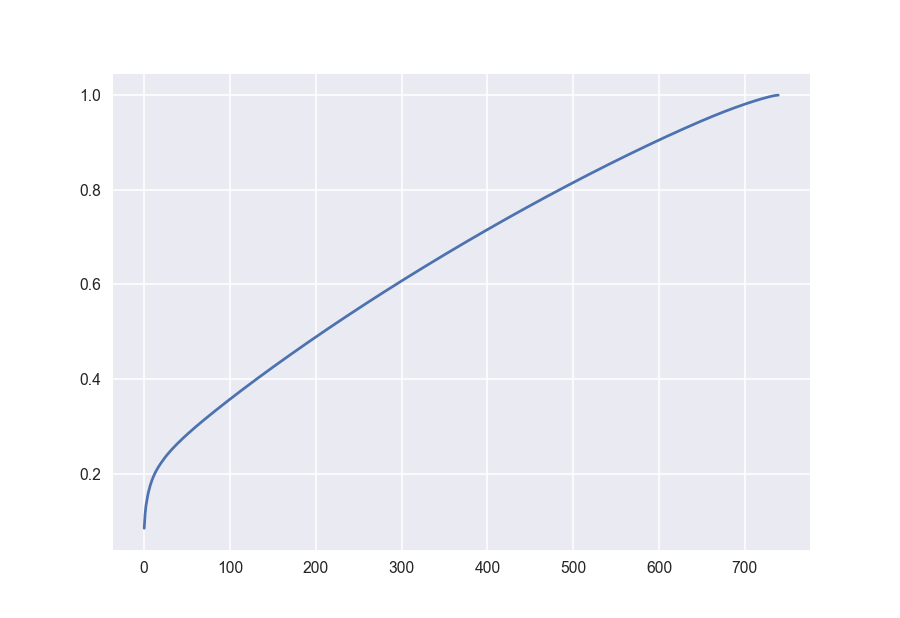

In [8]:
pca = PCA(n_components = 740)
pca.fit(X) ## we are cheating here we should only be fitting on X_train, but due to the huge number of features/little amount of examples 
            ## and the little processor power of my computer; we have to do this in order to keep a big enough number of features
X_test=pca.transform(X_test)
X_train=pca.transform(X_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [9]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Plotting while fitting

<IPython.core.display.Javascript object>


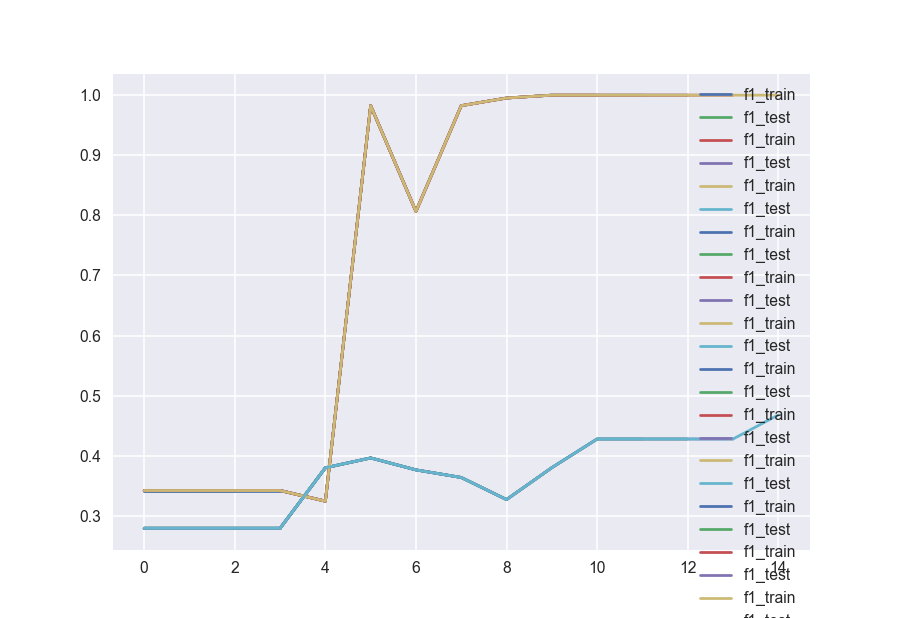

C:\Users\woill\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\woill\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       302
          1       1.00      1.00      1.00       327

avg / total       1.00      1.00      1.00       629

[[302   0]
 [  0 327]]
test: 
             precision    recall  f1-score   support

          0       0.62      0.35      0.45        68
          1       0.39      0.65      0.49        43

avg / total       0.53      0.47      0.46       111

[[24 44]
 [15 28]]


In [13]:
al=0.5
mlp = MLPClassifier(hidden_layer_sizes=(740,740,740,740,800,850,900,1000,900,850,800,740,740,740,740)

                    #(200,200,200,200,200,200,200,200,300,500,500,500,300,200,200,200
                    #                    ,200,200,200,200,200,200)
                    , max_iter=1, warm_start = True
                    , activation= 'relu'

                    #, activation= 'logistic' , solver='adam'
                    #, alpha=0.5, learning_rate='adaptive',learning_rate_init=0.1
            )
f1v_test=[]
f1v_train=[]
fig = plt.figure()  # make a figure
fig.show()
## plt.legend()
fig.canvas.draw()


for i in range (15):
    mlp.fit(X_train ,y_train )
    predictions_train = mlp.predict(X_train)
    predictions_test = mlp.predict(X_test)

    ## print("i = "+str(i))
    ## print("train: ")
    ## print(classification_report(y_train,predictions_train))
    ## print(confusion_matrix(y_train,predictions_train))
    ## print("test: ")
    ## print(classification_report(y_test,predictions_test))
    ## print(confusion_matrix(y_test,predictions_test))

    f1_test=f1_score(y_test,predictions_test, average='macro') ; f1v_test.append(f1_test)
    f1_train=f1_score(y_train,predictions_train, average='macro') ; f1v_train.append(f1_train)

    #plt.figure()
    #plt.show()
    fig.canvas.draw()
    plt.plot(f1v_train,label="f1_train")
    plt.plot(f1v_test,label="f1_test")

plt.legend()
predictions = mlp.predict(X_test)
print("train: ")
print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_train,predictions_train))
print("test: ")
print(classification_report(y_test,predictions_test))
print(confusion_matrix(y_test,predictions_test))

In [146]:
aa = pd.DataFrame(y_test)
bb = pd.DataFrame(predictions,index=list(aa.index))
yall=pd.concat([aa,bb], axis=1)
yall.columns=["cars","pred"]
yall["diffe"]=yall.cars-yall.pred

<IPython.core.display.Javascript object>


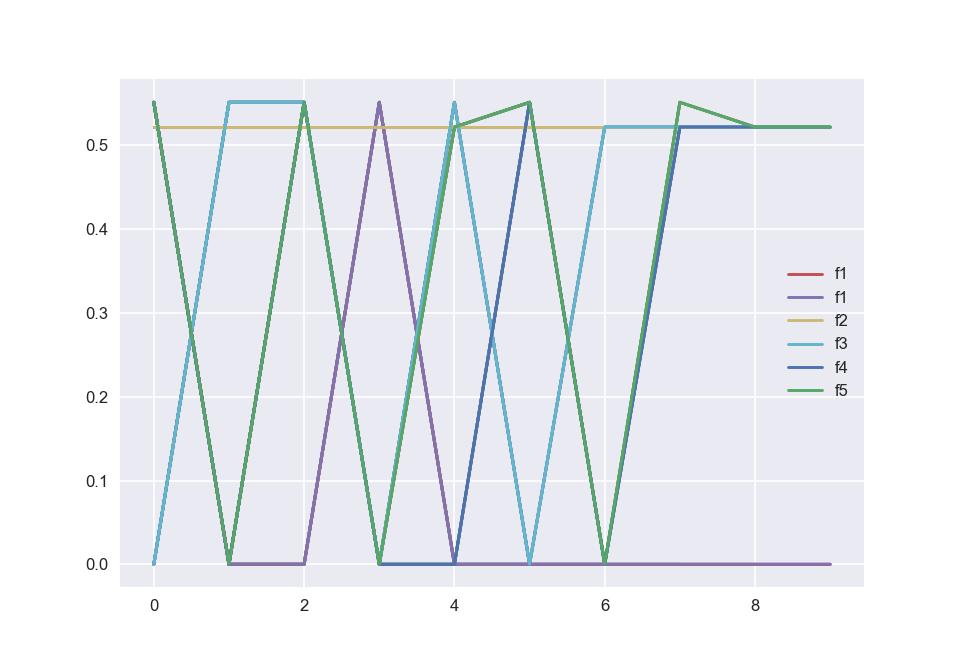

C:\Users\woill\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\woill\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\woill\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:565: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.0 0.521739130435 0.521739130435 0.521739130435 0.521739130435


C:\Users\woill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [50]:
mlp2 = MLPClassifier(hidden_layer_sizes=(250,700,900,1000,900,700,250), max_iter=1, warm_start = True
                    , alpha=0.5, activation= 'relu' , solver='sgd')
mlp2 = MLPClassifier(hidden_layer_sizes=(250,700,900,1000,900,700,250), max_iter=3, warm_start = True
                     ,alpha=0.5, activation= 'relu')
mlp3 = MLPClassifier(hidden_layer_sizes=(250,700,900,1000,900,700,250), max_iter=1, warm_start = True
                     ,alpha=0.1, activation= 'relu')
mlp4 = MLPClassifier(hidden_layer_sizes=(250,700,900,1000,900,700,250), max_iter=1, warm_start = True
                     ,alpha=0.01 , activation= 'relu')
mlp5 = MLPClassifier(hidden_layer_sizes=(250,700,900,1000,900,700,250), max_iter=1, warm_start = True
                     ,alpha=0.03 , activation= 'relu')

#, activation= 'logistic' , solver='adam'

f1v=[]
f2v=[]
f3v=[]
f4v=[]
f5v=[]

fig = plt.figure()  # make a figure
fig.show()
fig.canvas.draw()

for i in range (10):
    mlp1.fit(X_train, y_train)
    mlp2.fit(X_train, y_train)
    mlp3.fit(X_train, y_train)
    mlp4.fit(X_train, y_train)
    mlp5.fit(X_train, y_train)
    
    pred1=mlp1.predict(X_test)
    pred2=mlp2.predict(X_test)
    pred3=mlp3.predict(X_test)
    pred4=mlp4.predict(X_test)
    pred5=mlp5.predict(X_test)
    
    
    f1=f1_score(y_test,pred1) ; f1v.append(f1)
    f2=f1_score(y_test,pred2) ; f2v.append(f2)
    f3=f1_score(y_test,pred3) ; f3v.append(f3)
    f4=f1_score(y_test,pred4) ; f4v.append(f4)
    f5=f1_score(y_test,pred5) ; f5v.append(f5)
    

    fig.canvas.draw()
    plt.plot(f1v)
    plt.plot(f2v)
    plt.plot(f3v)
    plt.plot(f4v)
    plt.plot(f5v)

fig.canvas.draw()
plt.legend()
plt.plot(f1v,label="f1")
plt.plot(f1v,label="f1")
plt.plot(f2v,label="f2")
plt.plot(f3v,label="f3")
plt.plot(f4v,label="f4")
plt.plot(f5v,label="f5")
plt.legend()
print(f1,f2,f3,f4,f5)



In [119]:
pred=mlp.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,predictions_test))

             precision    recall  f1-score   support

          0       0.69      0.64      0.67        73
          1       0.61      0.66      0.63        61

avg / total       0.65      0.65      0.65       134

[[15 58]
 [16 45]]


In [ ]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30)
                    , activation= 'relu', max_iter=1, solver='sgd'
                    , alpha=0.01, learning_rate='adaptive',learning_rate_init=0.1)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(classification_report(y_test,predictions))

In [70]:
im = Image.open(pat+"resultat_"+str(1)+".png")
im_redi=im.resize((res_h , res_l),Image.ANTIALIAS)
r,g,b = im_redi.split()
rd=list(r.getdata()) ; gd=list(g.getdata()) ; bd=list(b.getdata()) 
X.iloc[i-1,:]=np.concatenate(([rd,gd,bd]))

## Functions

In [5]:
def extrc_ph(res_h,res_l,nb_pic,pat):
    X=pd.DataFrame(columns=range(1,3*res_h*res_l+1),index=range(1,nb_pic+1))
    for i in range(1,nb_pic+1):
        im = Image.open(pat+"resultat_"+str(i)+".jpg")
        im_redi=im.resize((res_h , res_l),Image.ANTIALIAS)
        if len(im_redi.split())==3 :
            r,g,b = im_redi.split()
        else:
            r,g,b,fucknose = im_redi.split()
        rd=list(r.getdata()) ; gd=list(g.getdata()) ; bd=list(b.getdata()) 
        X.iloc[i-1,:]=np.concatenate(([rd,gd,bd]))
        if i==round(nb_pic/2) or  i==round(nb_pic/4) or  i==round(3*nb_pic/4):
            print(100*i/nb_pic)
    return(X)

In [7]:
def extrc_ph_BW(res_h,res_l,nb_pic,pat):
    X=pd.DataFrame(columns=range(1,res_h*res_l+1),index=range(1,nb_pic+1))
    for i in range(1,nb_pic+1):
        im = Image.open(pat+"resultat_"+str(i)+".jpg")
        im_redi=im.resize((res_h , res_l),Image.ANTIALIAS)
        im_redi = im_redi.convert('1')
        rd=list(im_redi.getdata())
        X.iloc[i-1,:]=rd
        if i==round(nb_pic/2) or  i==round(nb_pic/4) or  i==round(3*nb_pic/4):
            print(100*i/nb_pic)
    return(X)

## Brouillon

In [352]:
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30,30)
                    , activation= 'relu', max_iter=1, solver='sgd'
                    , alpha=0.01, learning_rate='adaptive',learning_rate_init=0.1
                   )
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)


C:\Users\woill\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30)#,300000,300000,300000,300000,300000)
                    , activation= 'relu', warm_start = True , solver='sgd'
                    , alpha=0.01, learning_rate='adaptive',learning_rate_init=0.1)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='adaptive',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=True)

In [33]:
predictions_train = mlp.predict(X_train)
predictions_test = mlp.predict(X_test)

print(classification_report(y_test,predictions_test))
print(confusion_matrix(y_test,predictions_test))

print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_train,predictions_train))

             precision    recall  f1-score   support

          0       0.38      1.00      0.55        26
          1       0.00      0.00      0.00        42

avg / total       0.15      0.38      0.21        68

[[26  0]
 [42  0]]
             precision    recall  f1-score   support

          0       0.47      1.00      0.64        94
          1       0.00      0.00      0.00       108

avg / total       0.22      0.47      0.30       202

[[ 94   0]
 [108   0]]


C:\Users\woill\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [314]:
mlp.fit(X_train,y_train)
mlp.out_activation_="identity"
predictions = mlp.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.67      0.94      0.78        53
          1       0.96      0.72      0.82        90

avg / total       0.85      0.80      0.81       143



C:\Users\woill\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [471]:
"x"+str(range(0,2))

'xrange(0, 2)'

In [403]:
if (i >=10 and i<=99):
    print(i)

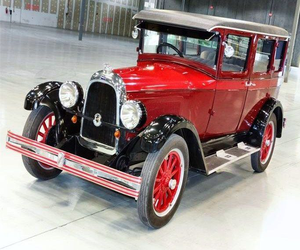

In [425]:
im_redi

In [209]:
im = im.convert('1')
len(im.split())
im.split()

[<PIL.Image.Image image mode=1 size=800x600 at 0x1F5DDEB9FD0>]

In [288]:
len(data2)

22500

In [427]:
r,g,b = im_redi.split()

In [428]:
len(list(r.getdata()))

75000

In [315]:
predictions

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1])

In [327]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [328]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [329]:
cancer['data'].shape

(569, 30)

In [330]:
X=cancer['data']
y=cancer['target']

In [331]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [333]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [334]:
print(mlp)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='adaptive',
       learning_rate_init=0.1, max_iter=1, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30)
                    , activation= 'relu', max_iter=1, solver='sgd'
                    , alpha=0.01, learning_rate='adaptive',learning_rate_init=0.1)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.58      0.73        50
          1       0.82      1.00      0.90        93

avg / total       0.88      0.85      0.84       143



C:\Users\woill\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [336]:
from PIL import Image

In [4]:
im = Image.open("C:/Users/woill/Downloads/téléchargement (2).jpg")  
data = list(im.getdata())
imNew=Image.new(im.mode ,im.size)  
imNew.putdata(data)

im

NameError: name 'Image' is not defined

In [3]:
from pylab import *

# create a new figure
figure()
gray()
# show contours with origin upper left corner
contour(im, origin='image')
axis('equal')
axis('off')


figure()


hist(im_array.flatten(), 128)

show()

NameError: name 'im' is not defined

In [338]:
imNew=Image.new(im.mode ,im.size)  
imNew.putdata(data)

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
clf1 = MLPClassifier(hidden_layer_sizes=(15,15,15), random_state=1, max_iter=1, warm_start=True)
clf2 = MLPClassifier(hidden_layer_sizes=(15,15), random_state=1, max_iter=1, warm_start=True)
clf3 = MLPClassifier(hidden_layer_sizes=(30,30,30), random_state=1, max_iter=1, warm_start=True)
clf4 = MLPClassifier(hidden_layer_sizes=(30,30), random_state=1, max_iter=1, warm_start=True)

v1=[]
v2=[]
v3=[]
v4=[]

for i in range(1000):
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    clf3.fit(X_train, y_train)
    clf4.fit(X_train, y_train)
    
    pred1=clf1.predict(X_test)
    pred2=clf2.predict(X_test)
    pred3=clf3.predict(X_test)
    pred4=clf4.predict(X_test)
    
    f1=f1_score(y_test, pred1, average='macro') ; v1.append(f1)
    f2=f1_score(y_test, pred2, average='macro') ; v2.append(f2)
    f3=f1_score(y_test, pred3, average='macro') ; v3.append(f3)
    f4=f1_score(y_test, pred4, average='macro') ; v4.append(f4)
    
    
    

C:\Users\woill\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


<IPython.core.display.Javascript object>


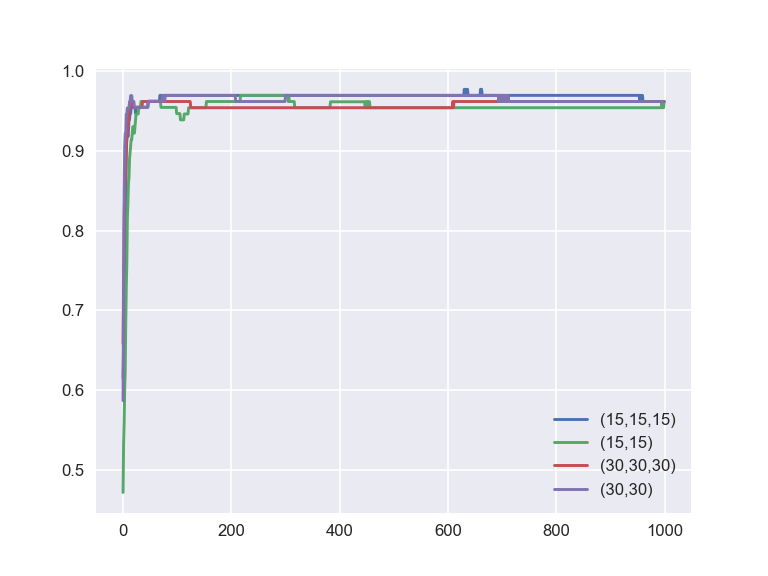

In [196]:
plt.figure()
plt.plot(v1,label="(15,15,15)")
plt.plot(v2,label="(15,15)")
plt.plot(v3,label="(30,30,30)")
plt.plot(v4,label="(30,30)")
plt.legend()
plt.show()

In [168]:
v1=[]

In [171]:
v1.append(1)

In [172]:
v1

[1, 1]

In [100]:
X.shape

(569, 30)

<IPython.core.display.Javascript object>


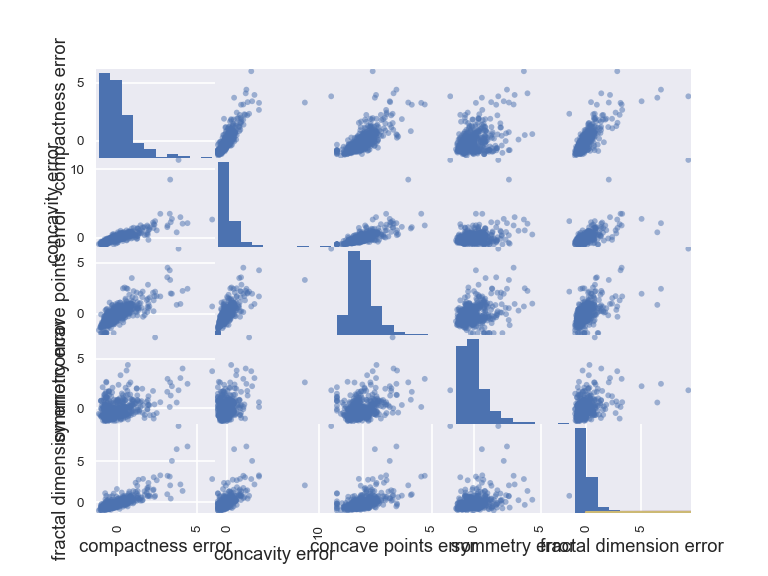

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C0F14B9E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021C11DC4F98>]], dtype=object)

In [60]:
pd.plotting.scatter_matrix(pd.DataFrame(X_train,columns=cancer.feature_names).iloc[:, range(15,20)])

In [102]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 0 53]
 [ 0 90]]


In [84]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        53
          1       0.98      0.98      0.98        90

avg / total       0.97      0.97      0.97       143



In [8]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
y = np.array([[0,1,1,0]]).T
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
for j in xrange(60000):
    l1 = 1/(1+np.exp(-(np.dot(X,syn0))))
    l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
    l2_delta = (y - l2)*(l2*(1-l2))
    l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
    syn1 += l1.T.dot(l2_delta)
    syn0 += X.T.dot(l1_delta)

NameError: name 'xrange' is not defined

In [105]:
## random test:
path = "C:/Users/woill/Downloads/Google Images/random test/"
res_h=300;res_l=250;nb_pic=85
im=Image.open(path+"rd1.jpg")
im_redi=im.resize((res_h , res_l),Image.ANTIALIAS)
r,g,b = im_redi.split()
rd=list(r.getdata());gd=list(g.getdata());bd=list(b.getdata())
xte=np.concatenate([rd,gd,bd])
xte = scaler.transform(xte)
predictions = mlp.predict(xte)

C:\Users\woill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\woill\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


ValueError: operands could not be broadcast together with shapes (225000,) (134,) (225000,) 